# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_results = pd.merge(mouse_metadata,study_results,how="left",on=["Mouse ID"])
combined_results=combined_results[["Mouse ID","Timepoint","Tumor Volume (mm3)","Metastatic Sites","Drug Regimen","Sex","Age_months","Weight (g)"]]

# # Display the data table for preview
combined_results_display=combined_results[combined_results["Timepoint"]==0]
combined_results_display=combined_results_display.reset_index(drop=True)
combined_results_display.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.0,0,Ramicane,Male,21,16
1,s185,0,45.0,0,Capomulin,Female,3,17
2,x401,0,45.0,0,Capomulin,Female,16,15
3,m601,0,45.0,0,Capomulin,Male,22,17
4,g791,0,45.0,0,Ramicane,Male,11,16


In [2]:
# Checking the number of mice.

Number_of_mice = combined_results['Mouse ID'].nunique()
Number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

Duplication_mice = combined_results[combined_results.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
Unique_duplicate = Duplication_mice['Mouse ID'].unique()

print(Unique_duplicate,Unique_duplicate.dtype)

['g989'] object


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_results_g989=combined_results[combined_results["Mouse ID"]=='g989']
combined_results_g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_results_no_duplicate_mouse=combined_results[combined_results["Mouse ID"]!='g989']
combined_results_no_duplicate_mouse.head()
combined_results_display_2=combined_results_no_duplicate_mouse[combined_results_no_duplicate_mouse["Timepoint"]==0]
combined_results_display_2=combined_results_display_2.reset_index(drop=True)
combined_results_display_2.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.0,0,Ramicane,Male,21,16
1,s185,0,45.0,0,Capomulin,Female,3,17
2,x401,0,45.0,0,Capomulin,Female,16,15
3,m601,0,45.0,0,Capomulin,Male,22,17
4,g791,0,45.0,0,Ramicane,Male,11,16


In [6]:
# Checking the number of mice in the clean DataFrame.
Number_of_mice = combined_results_no_duplicate_mouse['Mouse ID'].nunique()
Number_of_mice

248

## Summary Statistics

In [136]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

combined_results_no_duplicate_mouse_statistics=combined_results_no_duplicate_mouse.iloc[:,[2,4]]
combined_results_no_duplicate_mouse_statistics.set_index('Drug Regimen', inplace=True, drop=True)
mean_results=combined_results_no_duplicate_mouse_statistics.groupby("Drug Regimen").mean()
median_results=combined_results_no_duplicate_mouse_statistics.groupby("Drug Regimen").median()
var_results=combined_results_no_duplicate_mouse_statistics.groupby("Drug Regimen").var()
std_results=combined_results_no_duplicate_mouse_statistics.groupby("Drug Regimen").std()
sem_results=combined_results_no_duplicate_mouse_statistics.groupby("Drug Regimen").sem()


mean_results.rename(columns={'Tumor Volume (mm3)': 'Mean Tumor Volume'}, inplace=True)
median_results.rename(columns={'Tumor Volume (mm3)': 'Median Tumor Volume'}, inplace=True)
var_results.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume Variance'}, inplace=True)
std_results.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume Std. Dev.'}, inplace=True)
sem_results.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume Std.Err.'}, inplace=True)

Results_df=pd.merge(pd.merge(pd.merge(pd.merge(mean_results, median_results,on="Drug Regimen",how='inner'),var_results,on="Drug Regimen",how='inner'),std_results,on="Drug Regimen",how='inner'),sem_results,on="Drug Regimen",how='inner')
Results_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
advanced_method = combined_results_no_duplicate_mouse_statistics.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
advanced_method.rename(columns={'mean': 'Mean Tumor Volume','median':'Median Tumor Volume','var':'Tumor Volume Variance','std':'Tumor Volume Std. Dev.','sem':'Tumor Volume Std.Err.'}, inplace=True)
advanced_method

Tumor Volume (mm3)                                            \
              Mean Tumor Volume Median Tumor Volume Tumor Volume Variance   
Drug Regimen                                                                
Capomulin             40.675741           41.557809             24.947764   
Ceftamin              52.591172           51.776157             39.290177   
Infubinol             52.884795           51.820584             43.128684   
Ketapril              55.235638           53.698743             68.553577   
Naftisol              54.331565           52.509285             66.173479   
Placebo               54.033581           52.288934             61.168083   
Propriva              52.320930           50.446266             43.852013   
Ramicane              40.216745           40.673236             23.486704   
Stelasyn              54.233149           52.431737             59.450562   
Zoniferol             53.236507           51.818479             48.533355   

                                                           
             Tumor Volume Std. Dev. Tumor Volume Std.Err.  
Drug Regimen                                               
Capomulin                  4.994774              0.329346  
Ceftamin                   6.268188              0.469821  
Infubinol                  6.567243              0.492236  
Ketapril                   8.279709              0.603860  
Naftisol                   8.134708              0.596466  
Placebo                    7.821003              0.581331  
Propriva                   6.622085              0.544332  
Ramicane                   4.846308              0.320955  
Stelasyn                   7.710419              0.573111  
Zoniferol                  6.966589              0.516398

## Bar and Pie Charts

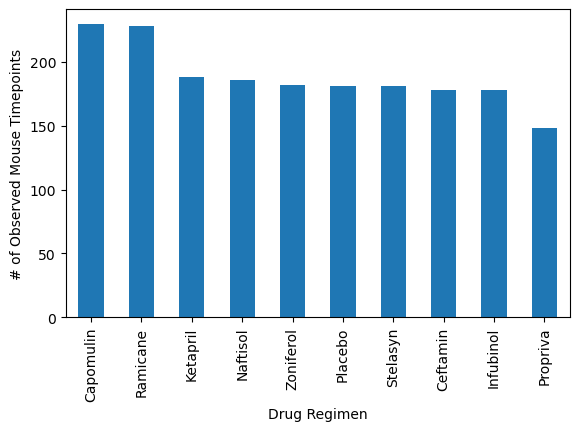

<Figure size 640x480 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

import numpy as np

combined_results_graphs=combined_results_no_duplicate_mouse[["Mouse ID","Timepoint","Tumor Volume (mm3)","Drug Regimen"]]
combined_results_graphs.set_index('Drug Regimen', inplace=True, drop=True)
count_results=combined_results_graphs.groupby("Drug Regimen").count()
count_results=count_results.sort_values("Mouse ID",ascending=False)
count_results=count_results["Mouse ID"]
count_results_graph=pd.DataFrame(count_results)
count_results_graph

count_results_graph.plot(kind="bar", figsize=(6.5,4), legend=False)

# Set a title for the chart
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()
plt.tight_layout()


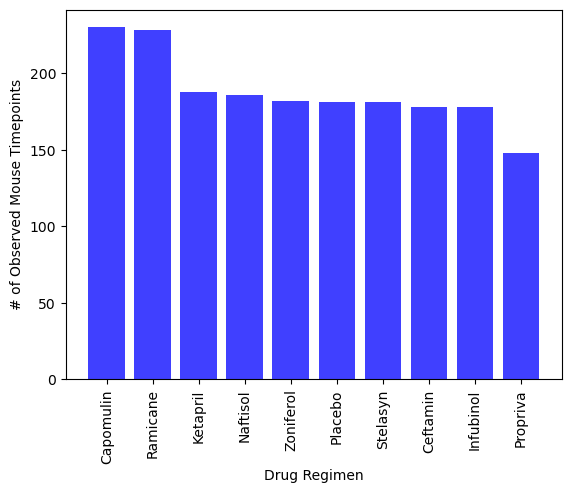

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
Drug_Regimen=count_results.index.unique()
Drug_Regimen

x_axis = np.arange(0, len(Drug_Regimen))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.bar(x_axis, count_results, facecolor="blue", alpha=0.75, align="center")
plt.xticks(tick_locations,Drug_Regimen, rotation='vertical')
plt.show()


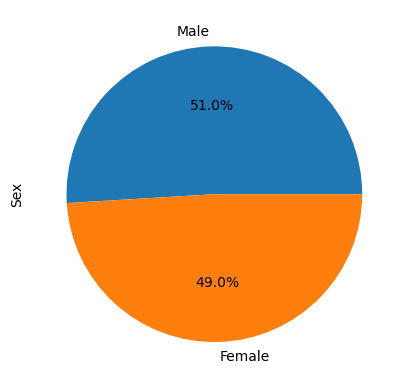

<Figure size 640x480 with 0 Axes>

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
combined_results_no_duplicate_mouse
number_male = combined_results_no_duplicate_mouse[combined_results_no_duplicate_mouse["Sex"] == "Male"].shape[0]
number_female = combined_results_no_duplicate_mouse[combined_results_no_duplicate_mouse["Sex"] == "Female"].shape[0]

Male_Female={'Male': [number_male], 'Female': [number_female]}
Male_Female_df=pd.DataFrame(Male_Female)
Male_Female_df=Male_Female_df.transpose()
Male_Female_df.rename(columns={Male_Female_df.columns[0]: 'Sex'}, inplace=True)
Male_Female_df

Male_Female_df.plot(kind="pie", y="Sex", legend=False, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()
plt.tight_layout()


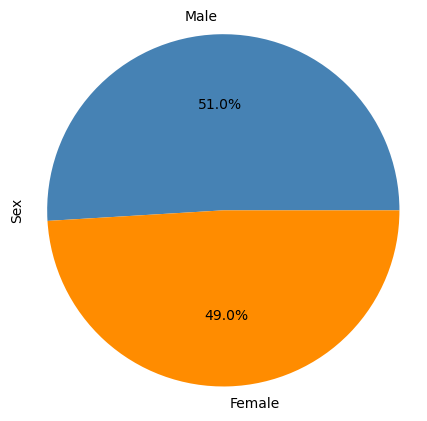

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Index_values=Male_Female_df.index[:2]
Result_Values=Male_Female_df["Sex"]
Colors=["steelblue","darkorange"]
explode=(0,0)
plt.figure(figsize=(5, 5))
plt.pie(Result_Values, explode=explode, labels=Index_values, colors=Colors,
        autopct="%1.1f%%", shadow=False, startangle=0)
plt.axis("equal")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Start by getting the last (greatest) timepoint for each mouse
Greatest_timepoint_df = combined_results_no_duplicate_mouse.groupby('Mouse ID')['Timepoint'].max().reset_index()
Greatest_timepoint_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Final_tumor_df = pd.merge(combined_results_no_duplicate_mouse,Greatest_timepoint_df,on=['Mouse ID','Timepoint'],how='inner')
Final_tumor_df=Final_tumor_df.reset_index(drop=True)
Final_tumor_df = Final_tumor_df.loc[(Final_tumor_df['Drug Regimen'] == 'Capomulin') | (Final_tumor_df['Drug Regimen'] == 'Ramicane') | (Final_tumor_df['Drug Regimen'] == 'Infubinol') | (Final_tumor_df['Drug Regimen'] == 'Ceftamin')]
Final_tumor_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,45,22.050126,1,Ramicane,Male,21,16
1,s185,45,23.343598,1,Capomulin,Female,3,17
2,x401,45,28.484033,0,Capomulin,Female,16,15
3,m601,45,28.430964,1,Capomulin,Male,22,17
4,g791,45,29.128472,1,Ramicane,Male,11,16
...,...,...,...,...,...,...,...,...
234,x822,45,61.386660,3,Ceftamin,Male,3,29
236,y163,45,67.685569,3,Infubinol,Female,17,27
240,y769,45,68.594745,4,Ceftamin,Female,6,27
241,y865,45,64.729837,3,Ceftamin,Male,23,26


In [71]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=Final_tumor_df['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
Tumor_volumes={}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes

    # Iterate over each treatment and create a DataFrame for tumor volumes

    # add subset 

for treatment in treatments:
    Tumor_volumes_data = Final_tumor_df.loc[Final_tumor_df["Drug Regimen"] == treatment, ["Tumor Volume (mm3)"]]
    Tumor_volumes[treatment] = Tumor_volumes_data["Tumor Volume (mm3)"].tolist()

Tumor_volumes_df=pd.DataFrame(Tumor_volumes)
Tumor_volumes_df

    # Determine outliers using upper and lower bounds
quartiles={}
iqr_values = {}
outliers = {}

for treatment in treatments:
    quartiles_data=Final_tumor_df.loc[Final_tumor_df["Drug Regimen"] == treatment, ["Tumor Volume (mm3)"]].quantile([.25,.5,.75])
    q1 = quartiles_data.loc[0.25, "Tumor Volume (mm3)"]
    q3 = quartiles_data.loc[0.75, "Tumor Volume (mm3)"]
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    potential_outliers = Final_tumor_df.loc[(Final_tumor_df["Drug Regimen"] == treatment) & ((Final_tumor_df["Tumor Volume (mm3)"] < lower_bound) | (Final_tumor_df["Tumor Volume (mm3)"] > upper_bound)), "Tumor Volume (mm3)"]
    quartiles[treatment] = quartiles_data["Tumor Volume (mm3)"].tolist()
    iqr_values[treatment] = iqr
    outliers[treatment] = potential_outliers.tolist()

for treatment in treatments:
    print(f"Treatment: {treatment}")
    print(f"Quartiles: {quartiles[treatment]}")
    print(f"IQR: {iqr_values[treatment]}")
    print(f"Potential Outliers: {outliers[treatment]}")



Treatment: Ramicane
Quartiles: [31.56046955, 36.56165229, 40.65900627]
IQR: 9.098536719999998
Potential Outliers: []
Treatment: Capomulin
Quartiles: [32.37735684, 38.1251644, 40.1592203]
IQR: 7.781863460000004
Potential Outliers: []
Treatment: Infubinol
Quartiles: [54.04860769, 60.16518046, 65.52574285]
IQR: 11.477135160000003
Potential Outliers: [36.3213458]
Treatment: Ceftamin
Quartiles: [48.72207785, 59.85195552, 64.29983003]
IQR: 15.577752179999997
Potential Outliers: []


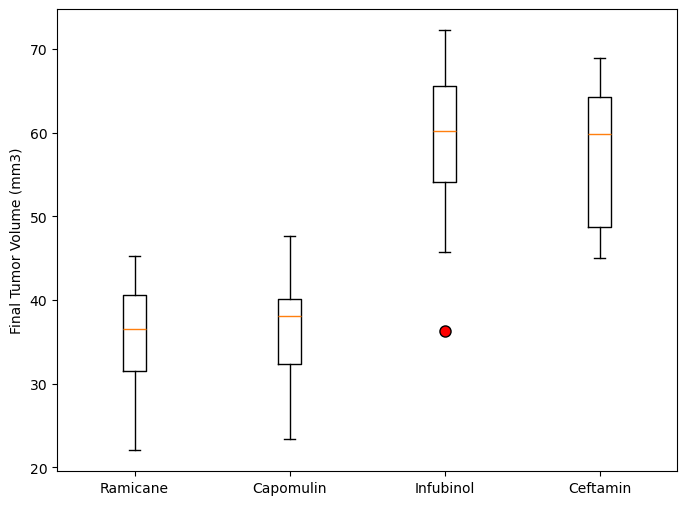

In [64]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots(figsize=(8, 6)) 
x_axis2=np.arange(0, len(treatments))
ax1.set_ylabel('Final Tumor Volume (mm3)')
boxplot1=ax1.boxplot(Tumor_volumes_df[['Ramicane']],positions=[0])
boxplot2=ax1.boxplot(Tumor_volumes_df[['Capomulin']],positions=[1])
boxplot3=ax1.boxplot(Tumor_volumes_df[['Infubinol']],positions=[2])
boxplot4=ax1.boxplot(Tumor_volumes_df[['Ceftamin']],positions=[3])
plt.setp(boxplot3['fliers'], markersize=8, markerfacecolor='r')
plt.xticks(x_axis2, treatments)
plt.show()

## Line and Scatter Plots

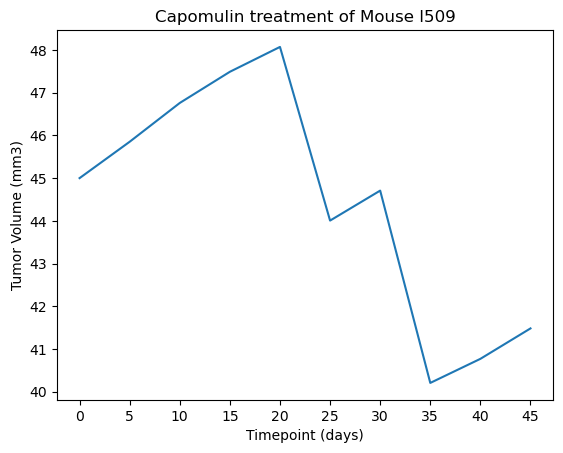

In [99]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Weight_mouse_i509 = combined_results_no_duplicate_mouse[(combined_results_no_duplicate_mouse['Mouse ID'] == 'l509') & (combined_results_no_duplicate_mouse['Drug Regimen'] == 'Capomulin')]
Weight_mouse_i509
Range=np.arange(0,len(Weight_mouse_i509))
Capomulin_treatment=plt.plot(Range,Weight_mouse_i509['Tumor Volume (mm3)'])
plt.xticks(Range, Weight_mouse_i509['Timepoint'])
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.title("Capomulin treatment of Mouse l509")

plt.show()

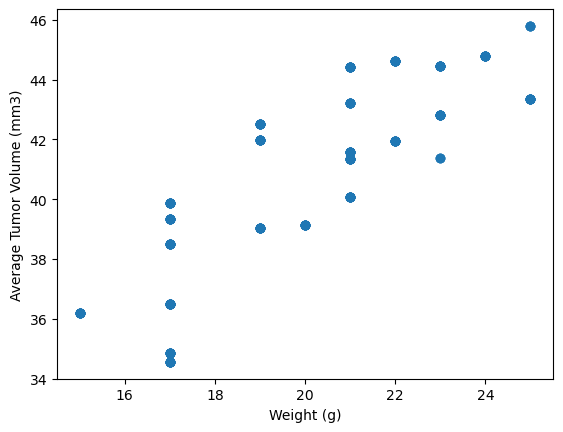

In [142]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Capomulin_regimen = combined_results_no_duplicate_mouse[(combined_results_no_duplicate_mouse['Drug Regimen'] == 'Capomulin')]
# average_weight = Capomulin_regimen.groupby('Weight (g)').mean()


Capomulin_regimen = combined_results_no_duplicate_mouse[combined_results_no_duplicate_mouse['Drug Regimen'] == 'Capomulin']
average_weight = Capomulin_regimen.groupby(['Weight (g)', 'Mouse ID'])['Tumor Volume (mm3)'].mean()
average_weight_df = pd.DataFrame(average_weight)
average_weight_df.rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume(mm3)'}, inplace=True)
merged_df=pd.merge(average_weight_df,Capomulin_regimen,on="Mouse ID",how='inner')
merged_df=merged_df[['Weight (g)','Mouse ID','Average Tumor Volume(mm3)']]
merged_df
plt.scatter(merged_df['Weight (g)'],merged_df['Average Tumor Volume(mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


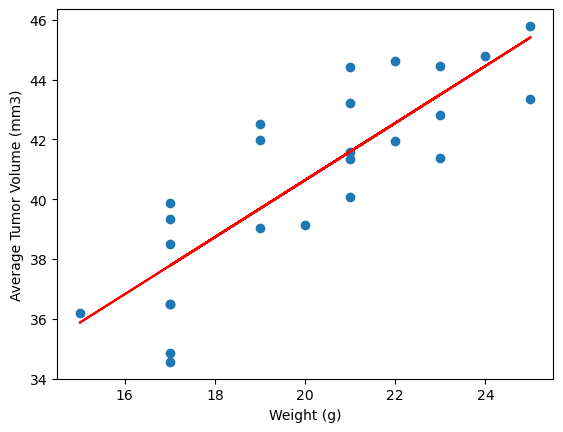

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
